# Backtesting of strategy based on Stochastic Dominace Contstarints benchmark against equally weighted portfolio

In [2]:
import datetime
from pprint import pprint
from matplotlib import pyplot as plt
from src.algorithms.strategy import  EqualyWeighted,StochasticDominance
from src.datasource.yahoodata import YahooDataSource
from src.backtest.backtest import BackTest


tickers = ['MSFT','MMM', 'AXP', 'AMGN', 'AAPL', 'CSCO','IBM','NVDA','TSLA','AMZN','MRK','QCOM']

column_name = 'Close'
interval = '1d'

start_date = datetime.datetime(2018,1,1)
end_date = datetime.datetime(2023,1,1)

In [3]:
main_data = YahooDataSource(tickers,start_date,end_date,columns=[column_name],interval=interval)
data = main_data.get_data()
main_data.get_data_by_frequency(start_date,end_date,'1d').ffill()

Adding MSFT to the data source
Getting data for MSFT
Adding MMM to the data source
Getting data for MMM
Adding AXP to the data source
Getting data for AXP
Adding AMGN to the data source
Getting data for AMGN
Adding AAPL to the data source
Getting data for AAPL
Adding CSCO to the data source
Getting data for CSCO
Adding IBM to the data source
Getting data for IBM
Adding NVDA to the data source
Getting data for NVDA
Adding TSLA to the data source
Getting data for TSLA
Adding AMZN to the data source
Getting data for AMZN
Adding MRK to the data source
Getting data for MRK
Adding QCOM to the data source
Getting data for QCOM


,MSFT,MMM,AXP,AMGN,AAPL,CSCO,IBM,NVDA,TSLA,AMZN,MRK,QCOM
Date,,,,,,,,,,,,
2018-01-03,79.844017,150.947525,90.065964,144.778900,40.472786,31.421680,108.896767,5.253853,21.150000,60.209999,43.414951,54.457954
2018-01-04,80.546753,152.920547,91.564064,144.168793,40.660782,31.510578,111.102325,5.281547,20.974667,60.479500,44.118690,54.532284
2018-01-05,81.545395,154.112152,91.772888,145.027771,41.123726,31.946985,111.645103,5.326304,21.105333,61.457001,44.072292,54.895660
2018-01-06,81.545395,154.112152,91.772888,145.027771,41.123726,31.946985,111.645103,5.326304,21.105333,61.457001,44.072292,54.895660
2018-01-07,81.545395,154.112152,91.772888,145.027771,41.123726,31.946985,111.645103,5.326304,21.105333,61.457001,44.072292,54.895660
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-26,234.405411,91.102135,142.827271,245.613342,130.344498,44.313663,129.377701,15.193552,123.150002,85.250000,105.924118,105.296043
2022-12-27,232.667526,91.162804,142.215225,245.120117,128.535538,44.360329,130.080963,14.109440,109.099998,83.040001,106.170303,103.985077
2022-12-28,230.281540,89.699272,139.903091,243.286789,124.591377,43.931004,127.888924,14.024508,112.709999,81.820000,105.185509,101.619621


In [4]:
equalyWeighted = EqualyWeighted()
StochasticDomin = StochasticDominance(equalyWeighted)


Adding ^GSPC to the data source
Getting data for ^GSPC
{'Total Return': np.float64(0.9606798275396908), 'Mean Daily Return': np.float64(0.0006545609898177181), 'Std Dev of Daily Return': np.float64(0.014162277579976111), 'Sharpe Ratio': np.float64(0.7336979185172354), 'Max Drawdown': np.float64(-0.3059970238513636), 'Calmar Ratio': np.float64(3.139507095357685), 'Alpha': np.float64(0.0003313725561875838), 'Beta': np.float64(1.0602528438556513)}


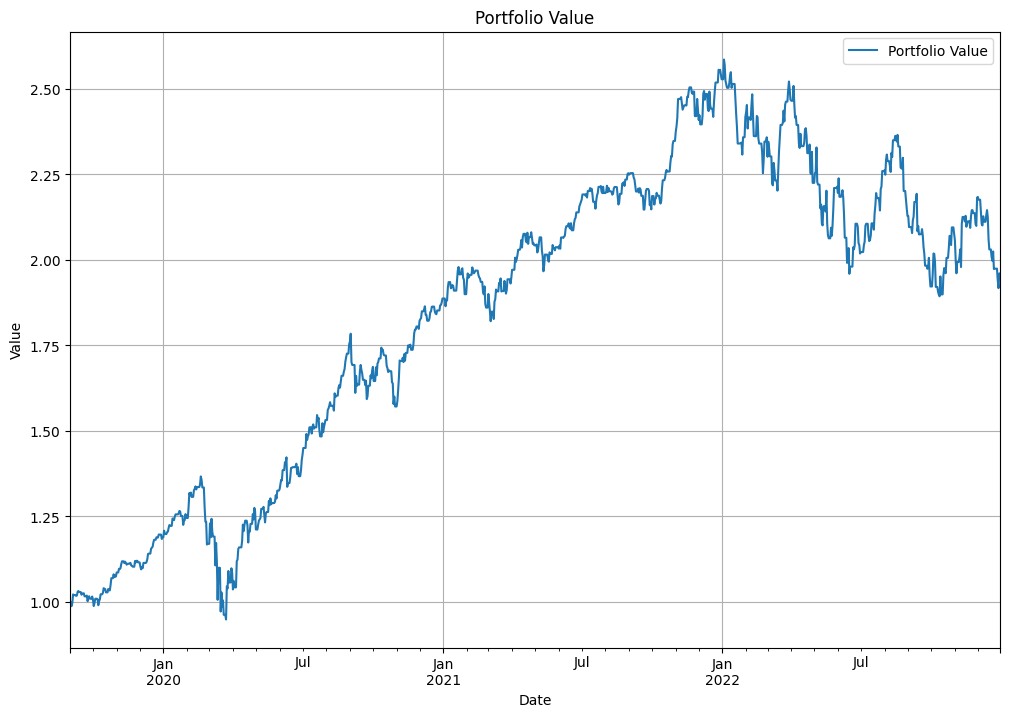

In [5]:

equalyWeighted_bt = BackTest(main_data, equalyWeighted)
equalyWeighted_bt.backtest(start_date, end_date, 20, 1, '1MS')
equalyWeighted_bt.plot_portfolio_returns()
equally_summary = equalyWeighted_bt.get_summary()
print(equally_summary)


Adding ^GSPC to the data source
Getting data for ^GSPC
{'Total Return': np.float64(1.97947652143829), 'Mean Daily Return': np.float64(0.0011164155338998286), 'Std Dev of Daily Return': np.float64(0.020829872088509577), 'Sharpe Ratio': np.float64(0.8508236200272398), 'Max Drawdown': np.float64(-0.4186702921413472), 'Calmar Ratio': np.float64(4.7280080736418695), 'Alpha': np.float64(0.0007457982202169328), 'Beta': np.float64(1.2158481552100753)}


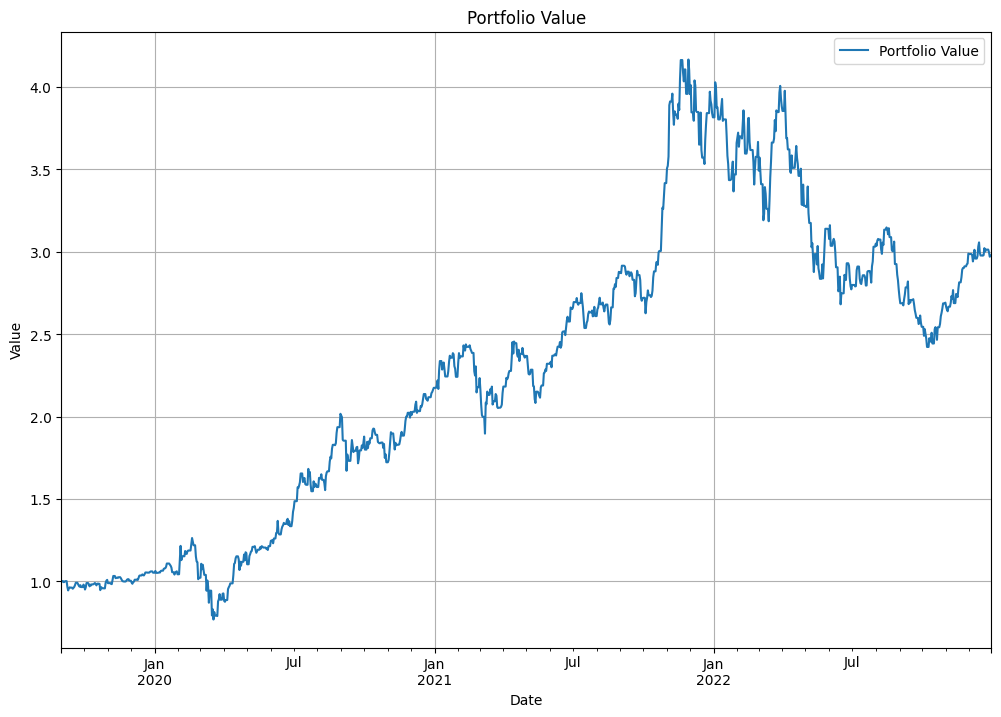

In [6]:
st_dominance = BackTest(main_data, StochasticDomin)
st_dominance.backtest(start_date, end_date, 20, 1, '1MS')
st_dominance.plot_portfolio_returns()
st_dominance_summary = st_dominance.get_summary()
print(st_dominance_summary)

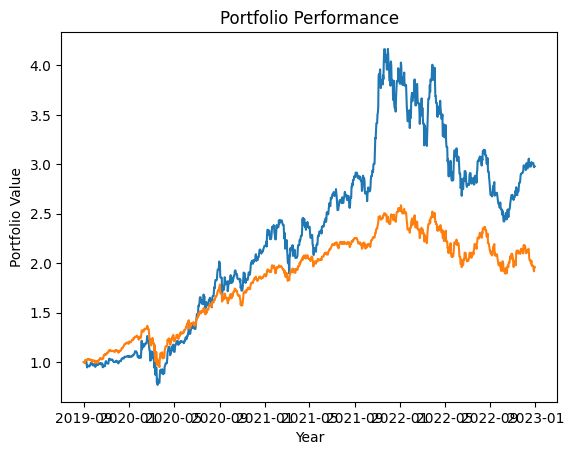

In [7]:
plt.plot(st_dominance.portfolio_value,label='Stochastic Dominance')
plt.plot(equalyWeighted_bt.portfolio_value,label='Equally Weighted')
plt.title('Portfolio Performance')
plt.ylabel('Portfolio Value')
plt.xlabel('Year')
plt.show()